# Maxime Girard
## TP2

In [2]:
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import sklearn.metrics
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet

Q1.1

In [42]:
ch_dataset = datasets.fetch_california_housing()
print(ch_dataset.DESCR)

X = ch_dataset.data
y = ch_dataset.target

# Split into train and tests
train_size = int(len(X) * 0.75)

indices = np.random.permutation(len(X))

X_train = X[indices[:train_size]]
y_train = y[indices[:train_size]]
X_test = X[indices[train_size:]]
y_test = y[indices[train_size:]]

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

First, let's plot some features distribution

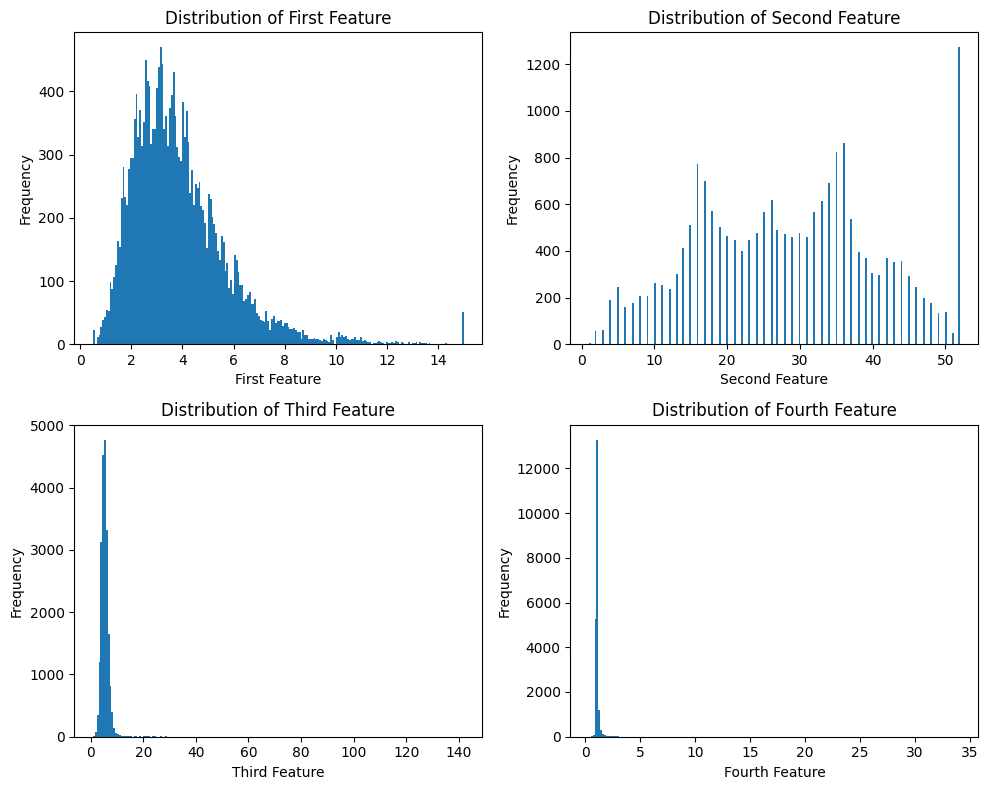

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].hist(X[:, 0], bins=200)
axs[0, 0].set_xlabel('First Feature')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Distribution of First Feature')

axs[0, 1].hist(X[:, 1], bins=200)
axs[0, 1].set_xlabel('Second Feature')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Distribution of Second Feature')

axs[1, 0].hist(X[:, 2], bins=200)
axs[1, 0].set_xlabel('Third Feature')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Distribution of Third Feature')

axs[1, 1].hist(X[:, 3], bins=200)
axs[1, 1].set_xlabel('Fourth Feature')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Distribution of Fourth Feature')

plt.tight_layout()
plt.show()

In [44]:
# we add a column of ones to the data matrix to represent the bias term
X_train_z = np.column_stack((np.ones(len(X_train)), X_train))
X_test_z = np.column_stack((np.ones(len(X_test)), X_test))

# we solve the OLS normal equation
coefficients = np.linalg.inv(X_train_z.T @ X_train_z) @ X_train_z.T @ y_train

print(coefficients)

[-3.70933767e+01  4.32527080e-01  9.22946677e-03 -9.94748692e-02
  6.03889160e-01 -1.32329515e-06 -3.38392721e-03 -4.24090316e-01
 -4.36739524e-01]


In [45]:
def MSE(X, y, y_pred):
    error = y - y_pred
    mse = 1/len(y) * np.sum(error**2)
    return mse

In [46]:
def R2(X, y, y_pred):
    ssres = np.sum((y - y_pred)**2)
    sstot = np.sum((y - np.mean(y))**2)
    return 1 - ssres/sstot

In [47]:
reg = LinearRegression().fit(X, y)
print(reg.coef_, reg.intercept_)

[ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01] -36.94192020718441


In [48]:
# compute MSE and R2 for the train  and test set for both models

y_pred_train = X_train_z @ coefficients
y_pred_test = X_test_z @ coefficients

print("Metrics for our model:")
print("MSE train: ", MSE(X_train_z, y_train, y_pred_train))
print("MSE test: ", MSE(X_test_z, y_test, y_pred_test))
print("R2 train: ", R2(X_train_z, y_train, y_pred_train))
print("R2 test: ", R2(X_test_z, y_test, y_pred_test))

y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
print("Metrics for sklearn:")
print("MSE train: ", sklearn.metrics.mean_squared_error(y_train, y_pred_train))
print("MSE test: ", sklearn.metrics.mean_squared_error(y_test, y_pred_test))
print("R2 train: ", reg.score(X_train, y_train))
print("R2 test: ", reg.score(X_test, y_test))

Metrics for our model:
MSE train:  0.519697331454087
MSE test:  0.5386248315988602
R2 train:  0.6076937433125263
R2 test:  0.6015380422837167
Metrics for sklearn:
MSE train:  0.5198131560695146
MSE test:  0.5378444765298851
R2 train:  0.6076063102653265
R2 test:  0.602115330574668


### Results :

| Metric | Our Model | sklearn Model |
|--------|-----------|---------------|
| MSE train | 0.5136 | 0.5146 |
| MSE test | 0.5613 | 0.5536 |
| R2 train | 0.6112 | 0.6105 |
| R2 test | 0.5882 | 0.5939 |

As we can see, the results of our model are very close to those of sklearn model. The slight differences could bo induced by numerical computation errors. These errors differs between our method and sklearn's because we may have implemented things differently.

Q1.2

Let's find the confidence interval for each regression coefficient, using the CI formula of the lecture (session 3)

In [49]:
def CI(coeff, X, y, alpha):
    m = np.mean(y)
    y_pred = X @ coeff
    sigma = np.sqrt(1/(len(y) - 8 - 1) * np.sum((y - y_pred)**2))
    t = scipy.stats.t.ppf(1 - alpha/2, len(y) - 8 - 1)
    diag = np.linalg.inv(X.T @ X).diagonal()**0.5
    ci = [coeff - t * sigma * diag, coeff + t * sigma * diag]
    return ci

ci = CI(coefficients, X_train_z, y_train, 0.05)
for i in range(len(coefficients)):
    print(f"coef_{i} : {coefficients[i]} in [{ci[0][i]}, {ci[1][i]}]")


coef_0 : -37.09337669095883 in [-38.568209948553715, -35.61854343336394]
coef_1 : 0.43252707959840114 in [0.42312820316110084, 0.44192595603570145]
coef_2 : 0.00922946677101605 in [0.008224655517757955, 0.010234278024274145]
coef_3 : -0.09947486919117629 in [-0.11255064800805938, -0.0863990903742932]
coef_4 : 0.6038891598103737 in [0.5415561527808435, 0.666222166839904]
coef_5 : -1.3232951474579547e-06 in [-1.187350152241234e-05, 9.22691122749643e-06]
coef_6 : -0.003383927212907904 in [-0.004347637600033391, -0.002420216825782417]
coef_7 : -0.42409031609023545 in [-0.4402384672394607, -0.4079421649410102]
coef_8 : -0.436739524275236 in [-0.453611367244586, -0.419867681305886]


The confidence intervals for the regression coefficients are as follows:

- $\theta_0$: -37.09 in $[-38.57, -35.62]$
- $\theta_1$: 0.43 in $[0.42, 0.44]$
- $\theta_2$: 0.0092 in $[0.0082, 0.0102]$
- $\theta_3$: -0.099 in $[-0.113, -0.086]$
- $\theta_4$: 0.604 in $[0.542, 0.666]$
- $\theta_5$: -1.32e-06 in $[-1.19e-05, 9.23e-06]$
- $\theta_6$: -0.0034 in $[-0.0043, -0.0024]$
- $\theta_7$: -0.424 in $[-0.440, -0.408]$
- $\theta_8$: -0.437 in $[-0.454, -0.420]$


Q2.1

First, we load, split and scale the data

In [3]:
# Load the data from the CSV file
data = pd.read_csv('data.csv').to_numpy()

# Split the data into features (X) and target variable (y)
X = data[:, :-1]
y = data[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Let's scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(330, 210) (111, 210) (330,) (111,)


Q2.2

Perform a linear regression, using sklearn

In [4]:
# Let's train the model
reg = LinearRegression().fit(X_train, y_train)

# Let's evaluate the model
print("R2 train: ", reg.score(X_train, y_train))
print("R2 test: ", reg.score(X_test, y_test))

R2 train:  0.49725791824762666
R2 test:  0.2826889021143001


The results are :

$R^2$ score on train : 0.497 \
$R^2$ score on test : 0.283

Q3

In [5]:
def find_p_value(X, y, no_effect=False):
    # we assume x to be unidimensional
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    theta = reg.coef_[0]
    
    # test of no effect
    sigma = np.sqrt(1/(len(y) - 2) * np.sum((y - y_pred)**2))
    d = np.linalg.inv(X.T @ X)[0, 0]**0.5
    T = theta / (sigma * d)
    
    if no_effect:
        t = scipy.stats.t.ppf(1 - 0.05/2, len(y) - 2)
        if abs(T) > t:
            print("|T| > t. The feature has a significant effect on the target variable")
        else:
            print("|T| < t. The feature has no significant effect on the target variable")  
            
    # p-value
    p = 2 * (1 - scipy.stats.t.cdf(abs(T), len(y) - 2))
    
    return p
        

In [6]:
def find_min_p_value(X, y, S):
    p_values = []
    for i in range(X.shape[1]):
        p_values.append(find_p_value(X[:, i].reshape(-1, 1), y))
    list_p_values = list(p_values)
    for i in S:
        p_values[i] = 1
    return p_values.index(min(p_values)), min(p_values), list_p_values

The selected features are:  [34, 58, 79, 167, 135, 123, 53, 159, 208, 130]


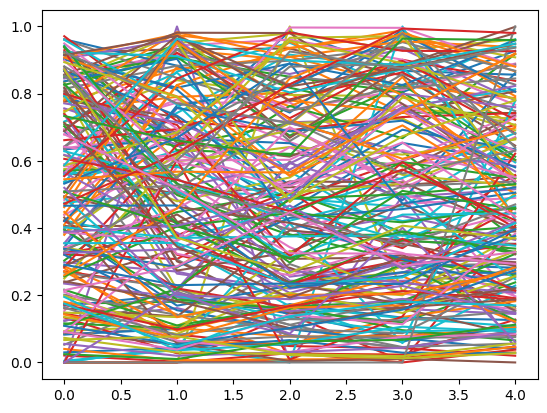

In [7]:
S = []
X_copy = X_train.copy()
y_copy = y_train.copy()

current_p_value = 0
j = 0

lists_p_values = []

while current_p_value < 0.05:
    i, current_p_value, list_p_values = find_min_p_value(X_copy, y_copy, S)
    S.append(i)
    y_copy = y_copy - LinearRegression().fit(X_copy[:, i].reshape(-1, 1), y_copy).predict(X_copy[:, i].reshape(-1, 1))
    
    if j < 5:
        lists_p_values.append(list_p_values)
    j += 1
    
print("The selected features are: ", S) 

for coeff_vals in (list(zip(*lists_p_values))):
    plt.plot(coeff_vals)

plt.show()

p-values are chnaging a lot between runs, the graph is unreadable.

Q4

In [22]:
def plot_coefficients_and_r2(model, min_val, max_val):
    coeffs = []
    r2_list = []

    for alpha in 10**np.linspace(min_val, max_val, 30):
        clf = model(alpha=alpha)
        clf.fit(X_train, y_train)
        coeffs.append(clf.coef_)
        r2_list.append(clf.score(X_test, y_test))

    plt.figure()
    plt.xscale('log')
    for coeff in (list(zip(*coeffs))):
        plt.plot(10**np.linspace(min_val, max_val, 30), coeff)

    plt.show()

    plt.figure()  
    plt.xscale('log')
    plt.plot(10**np.linspace(min_val, max_val, 30), r2_list)

    plt.show()

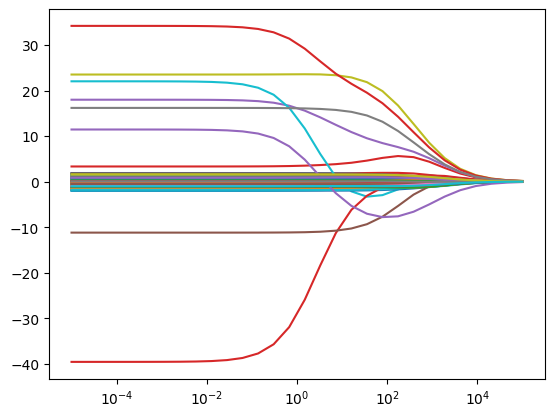

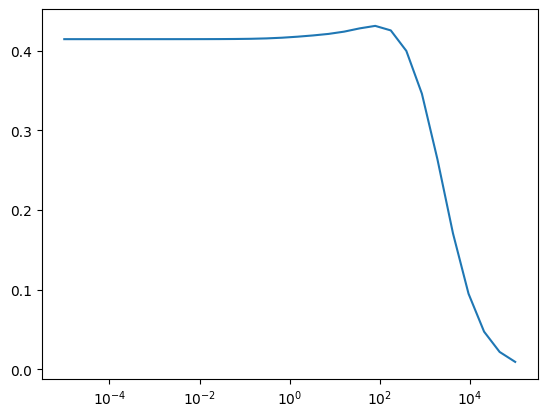

In [23]:
plot_coefficients_and_r2(Ridge, -5, 5)

We can see that the coefficients are converging to 0 when the penalty rise.
Considering the $R^2$ score, we can see that the model first improve when the penalty rise (up to alpha around 10^2, and a max score around 0.41), but then it starts to decrease and collapse.

Q5

/home/maxime/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.172e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
/home/maxime/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.161e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
/home/maxime/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

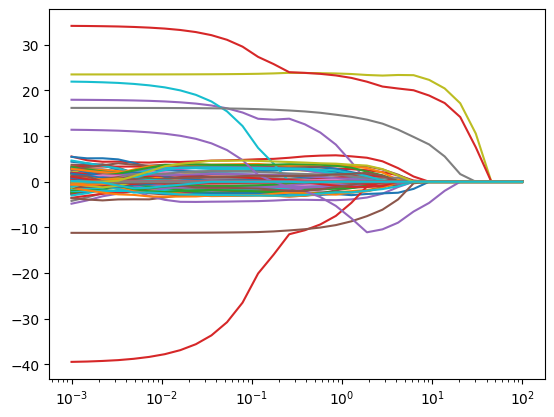

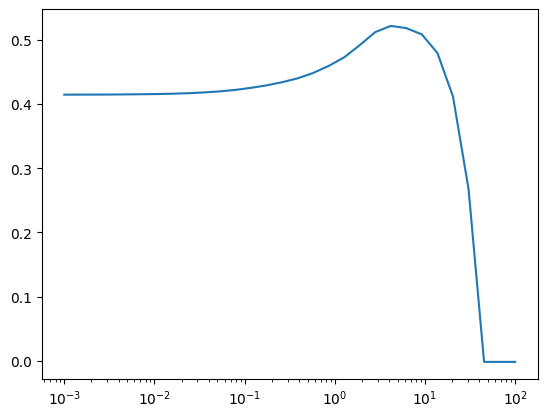

In [26]:
plot_coefficients_and_r2(Lasso, -3, 2)

The coefficients converge to 0 at the end but, in the same time the $R^2$ score is increasing. The $R^2$ score has it peak at 0.51 around alpha = 1,5. However, after this point the score collapse.

Q6

/home/maxime/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.836e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
/home/maxime/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.345e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
/home/maxime/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

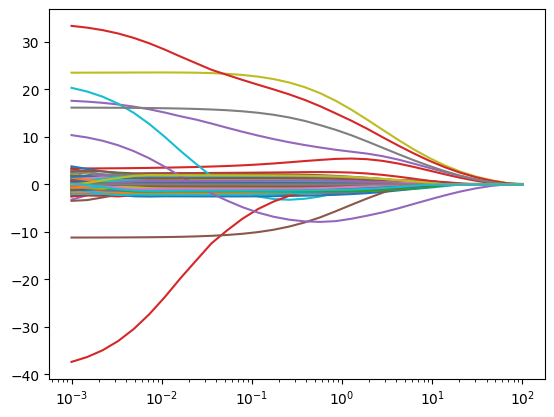

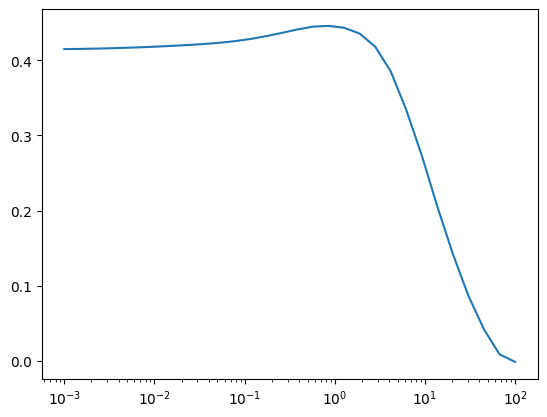

In [27]:
plot_coefficients_and_r2(ElasticNet, -3, 2)

The shape of the curves are very lookalike of the Q4 (Ridge). The best alpha is around 1, and the $R^2$ score is around 0.45.

Q7

In [5]:
cov = X.T @ X

U, s, V = np.linalg.svd(cov)

Q7a

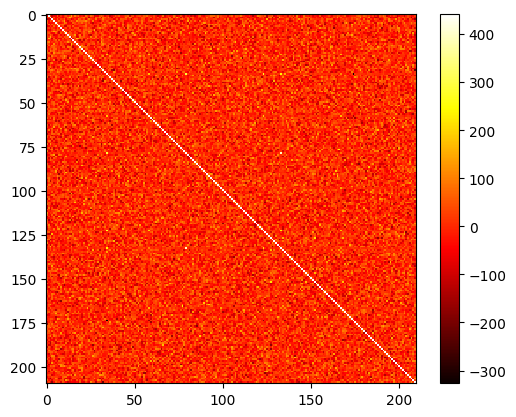

In [6]:
# heatmap of the cov matrix
plt.imshow(cov, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

We observe very high values on the diagonal of the covariance matrix.

Q7b

(https://en.wikipedia.org/wiki/Principal_component_analysis)

In [8]:
# perform principal component analysis using svd
X_pca = X @ V[:, :2]

Q7c

45 firsts components explain 90% of the variance


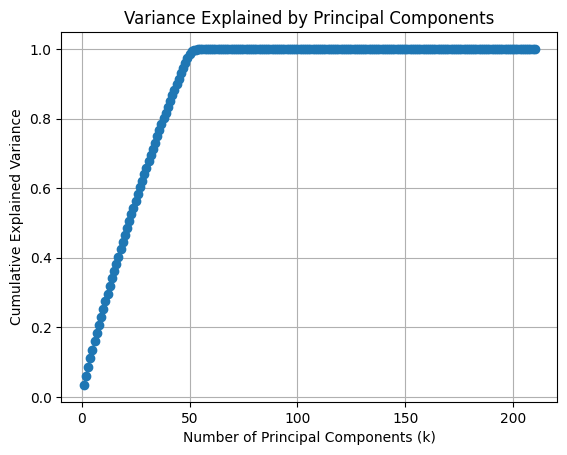

In [9]:
# Calculate the explained variance
explained_variance = np.square(s) / np.sum(np.square(s))

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Print the number of components needed to explain 90% of the variance
print(f"{np.argmax(cumulative_explained_variance > 0.9) + 1} firsts components explain 90% of the variance")

# Plot the amount of variance explained by the first k components
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


Q7d

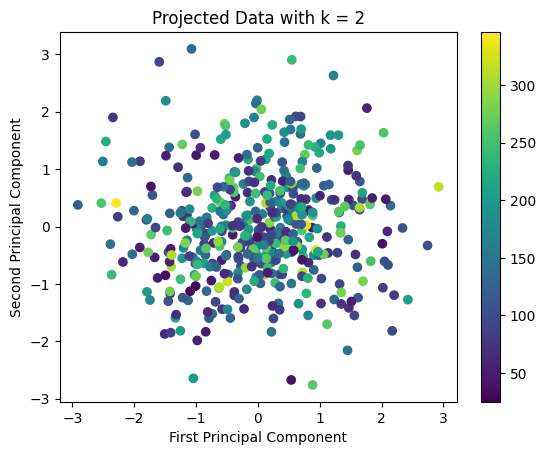

In [10]:
# Plot the projected data with k = 2 using as color the value of y
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.colorbar()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Projected Data with k = 2')
plt.show()

Q7e

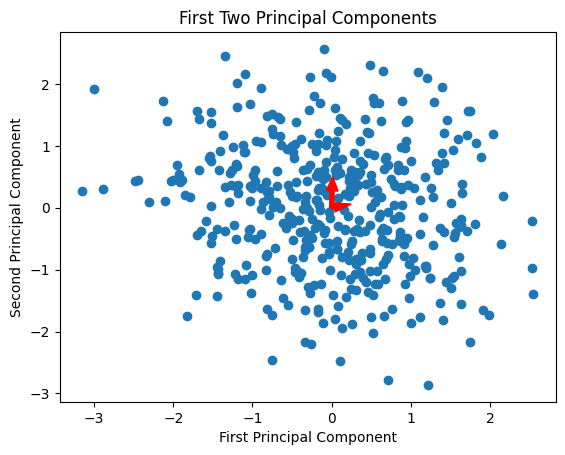

In [17]:
# plot of the first two principal components

plt.scatter(X[:, 0], X[:, 1])
# plot the two principal dimensions of the PCA
plt.arrow(0, 0, U[0, 0], V[1, 0], color='r', width=0.05)
plt.arrow(0, 0, U[0, 1], V[1, 2], color='r', width=0.05)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('First Two Principal Components')
plt.show()